এখানে আমি পুরোটা আবার ডেস্ক্রাইব করবো না । কারণ একই জিনিসগুলা আবার করা হয়েছে । 
শুধু আউটলেয়ার বাদ দেয়ার সেল গুলোর ডেস্ক্রিপশন দেবো । 

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df = df.fillna(df.median().iloc[0])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
test = pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
test = test.fillna(test.median().iloc[0])
test.isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

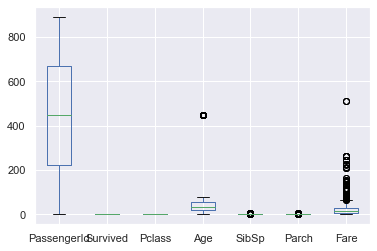

In [9]:
df.plot(kind='box')
plt.show()

In [10]:
del df['Name']
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,446,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,446,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,446,S


তো এখানে আমাদের এই ইউজার ডিফাইন্ড ফাংশন ইউজ করতে হবে । এখানে যে কাজটি করা হয়েছে তা হলো এখানে আসলে ইন্টার কোয়ার্টাইল রেঞ্জ হিসেব করে তার থেকে লোয়ার বাউন্ড ও আপার বাউন্ড ক্যাল্কুলেট করা হয় । এই লোয়ার বাউন্ড এবং আপার বাউন্ডের ভিতরে থাকা ভ্যালুগুলো বাদে বাকি সব ভ্যালু হলো আউটলেয়ার । বিস্তারিত জানতে এখানে দেখে নিতে পারেন 
<a href="https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule"> Outlier Detection </a>

In [11]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()

এবার এখানে আমরা শুধু বয়স এবং ভাড়ার কলামেই আউটলেয়ার পেয়েছিলাম । তাই শুধু এই ২ টি নিউমেরিক্যাল কলামে আমরা আউটলেয়ার ডিটেক্ট করবো । এবং সেগুলো মিডিয়ান দিয়ে ফিলআপ করবো । 

In [12]:
num_cols = ['Fare','Age']

for col in num_cols:
    indx = detect_outlier(df[col])
    df[col].loc[indx] = df[col].median()

আউটলেয়ার ফিক্স করার পরে আমাদের আউটলেয়ার আছে কিনা দেখে নেই ।

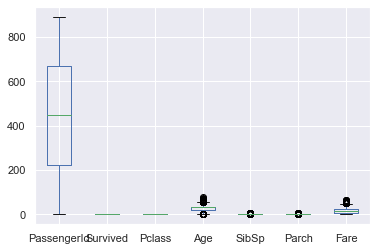

In [13]:
df.plot(kind='box')
plt.show()

কোন আউটলেয়ার নেই তাহলে । বেশ । এবার সামনে যাওয়া যাক লাফিয়ে লাফিয়ে !

In [14]:
cat_cols = ['Sex','SibSp','Parch','Ticket','Cabin','Embarked']

for col in cat_cols:
    df[col] = df[col].astype('category')
    #print(col,'---->', dict(enumerate(df[col].cat.categories)))
    df[col] = df[col].cat.codes
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,0,3
1,2,1,1,0,38.0,1,0,596,14.4542,82,1
2,3,1,3,0,26.0,0,0,669,7.9250,0,3
3,4,1,1,0,35.0,1,0,49,53.1000,56,3
4,5,0,3,1,35.0,0,0,472,8.0500,0,3


In [15]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,30.156195,0.507295,0.381594,338.528620,17.383622,17.629630,2.529742
std,257.353842,0.486592,0.836071,0.477990,13.034420,1.005995,0.806057,200.850657,12.713016,38.140335,0.800254
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,158.500000,7.910400,0.000000,2.000000
50%,446.000000,0.000000,3.000000,1.000000,32.000000,0.000000,0.000000,337.000000,14.454200,0.000000,3.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,519.500000,24.150000,0.000000,3.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,6.000000,6.000000,680.000000,65.000000,147.000000,3.000000


In [16]:
corr_mtx = df.corr()
corr_mtx

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.031703,-0.065229,-0.001652,-0.056554,0.002589,-0.000637,0.012985
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.076132,-0.026385,0.081629,-0.164549,0.190926,0.276235,-0.176509
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.318328,0.078141,0.018443,0.319869,-0.433904,-0.537419,0.173511
Sex,0.042939,-0.543351,0.131900,1.000000,0.087835,-0.123164,-0.245489,0.059372,-0.102979,-0.137704,0.118492
Age,0.031703,-0.076132,-0.318328,0.087835,1.000000,-0.255110,-0.187491,-0.066475,0.053241,0.148340,-0.049862
SibSp,-0.065229,-0.026385,0.078141,-0.123164,-0.255110,1.000000,0.423338,0.069238,0.291704,-0.019989,0.069165
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.187491,0.423338,1.000000,0.020003,0.293337,0.033585,0.043351
Ticket,-0.056554,-0.164549,0.319869,0.059372,-0.066475,0.069238,0.020003,1.000000,-0.231260,-0.176515,0.011146
Fare,0.002589,0.190926,-0.433904,-0.102979,0.053241,0.291704,0.293337,-0.231260,1.000000,0.245097,-0.021241
Cabin,-0.000637,0.276235,-0.537419,-0.137704,0.148340,-0.019989,0.033585,-0.176515,0.245097,1.000000,-0.070245


এবার দেখে নেই টেস্ট ডেটাসেটের আউটলেয়ার গুলো । 

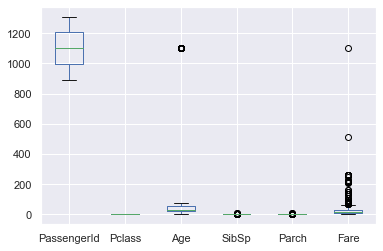

In [17]:
test.plot(kind='box')
plt.show()

এবার ট্রেইন ডেটাসেটের মতো একই ভাবে এখানকার আউটলেয়ার গুলো মিডিয়ান দিয়ে ফিলআপ করে ফেলি । 

In [18]:
for col in num_cols:
    indx = detect_outlier(test[col])
    test[col].loc[indx] = test[col].median()

একই ভাবে দেখে নেই এখানে কি অবস্থা আউটলেয়ারের । 

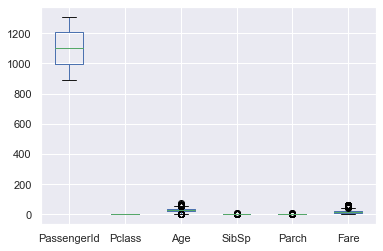

In [19]:
test.plot(kind='box')
plt.show()

আউটলেয়ার ফিক্সড!!!

In [20]:
for col in cat_cols:
    test[col] = test[col].astype('category')
    #print(col,'---->', dict(enumerate(df[col].cat.categories)))
    test[col] = test[col].cat.codes
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,152,7.8292,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,221,7.0000,0,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,73,9.6875,0,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,147,8.6625,0,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,138,12.2875,0,2


In [21]:
corr_mtx = test.corr()
corr_mtx

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,-0.026751,0.023245,-0.030434,-0.002157,0.034036,-0.012301,-0.022608,0.023544,0.040699
Pclass,-0.026751,1.000000,0.108615,-0.424491,-0.008977,0.011067,0.292088,-0.519219,-0.506023,0.227983
Sex,0.023245,0.108615,1.000000,0.004275,-0.105519,-0.169750,-0.047663,-0.147965,-0.093996,0.076281
Age,-0.030434,-0.424491,0.004275,1.000000,-0.084233,-0.050642,-0.121170,0.105316,0.210828,-0.162568
SibSp,-0.002157,-0.008977,-0.105519,-0.084233,1.000000,0.334818,0.014975,0.235756,0.051783,0.049236
Parch,0.034036,0.011067,-0.169750,-0.050642,0.334818,1.000000,0.107950,0.207585,0.023194,0.051827
Ticket,-0.012301,0.292088,-0.047663,-0.121170,0.014975,0.107950,1.000000,-0.184240,-0.198805,0.093672
Fare,-0.022608,-0.519219,-0.147965,0.105316,0.235756,0.207585,-0.184240,1.000000,0.244675,-0.042164
Cabin,0.023544,-0.506023,-0.093996,0.210828,0.051783,0.023194,-0.198805,0.244675,1.000000,-0.238288
Embarked,0.040699,0.227983,0.076281,-0.162568,0.049236,0.051827,0.093672,-0.042164,-0.238288,1.000000


In [22]:
del test['Name']
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,0,1
1,893,3,0,47.0,1,0,221,7.0000,0,2
2,894,2,1,62.0,0,0,73,9.6875,0,1
3,895,3,1,27.0,0,0,147,8.6625,0,2
4,896,3,0,22.0,1,1,138,12.2875,0,2


In [23]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=7) #random_state is a state that defines that your model should train each 
#time exact same way you run last time.



In [24]:
X_train = df.loc[:, df.columns!='Survived']
Y_train = df.loc[:, df.columns=='Survived']
X_test = test.loc[:,]
tree.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=7, splitter='best')

In [25]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,0,3
1,2,1,1,0,38.0,1,0,596,14.4542,82,1
2,3,1,3,0,26.0,0,0,669,7.9250,0,3
3,4,1,1,0,35.0,1,0,49,53.1000,56,3
4,5,0,3,1,35.0,0,0,472,8.0500,0,3


In [26]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,1,34.5,0,0,152,7.8292,0,1
1,893,3,0,47.0,1,0,221,7.0000,0,2
2,894,2,1,62.0,0,0,73,9.6875,0,1
3,895,3,1,27.0,0,0,147,8.6625,0,2
4,896,3,0,22.0,1,1,138,12.2875,0,2


In [27]:
Y_pred = tree.predict(X_test)

In [28]:
Y_pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [29]:
Y_ID = test.loc[:, test.columns=='PassengerId']
Y_ID = Y_ID.values

prediction = pd.DataFrame({ 'PassengerId':Y_ID.ravel(),'Survived': Y_pred.ravel()})

prediction.to_csv("Pred2.csv",index=False)

যথারীতি সাবমিট করে ফেলেন এই সিএসভি ফাইলটিকে । 
তো আউটলেয়ার হ্যান্ডেলের পরে আমাদের একুরেসি কতো এলো সাবমিশনের পরে? দেখেন তো এমন কিনা । <img src="pred2.jpg">

এবার দেখি তো আরো কিভাবে করা যায় বেটার! এতোক্ষন আমরা কিন্তু নাল ভ্যালু গুলো ফুল ডেটাফ্রেমের মিডিয়ান দিয়ে ফিলআপ করেছি । এবার করবো যার যার নিজস্ব কলামের মিডিয়ান দিয়ে । চলেন চলে যাই  titanic_3rd_try.ipynb তে । 